In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('accepted_2007_to_2018Q4.csv')

C:\Users\vuhoa\AppData\Local\Temp\ipykernel_26276\3701891125.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('accepted_2007_to_2018Q4.csv')


In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df['loan_status'].value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

**chỉ sử dụng 2 nhãn: "Fully Paid" và "Charged Off" để dự đoán**

In [5]:
df = df[(df['loan_status'] == 'Fully Paid') | (df['loan_status'] == 'Charged Off')]

In [6]:
df.shape

(1345310, 151)

In [7]:
cleaner_app_type1 = {"loan_status": { 'Fully Paid': 0.0, 'Charged Off': 1.0}}
df = df.replace(cleaner_app_type1)

In [8]:
df['loan_status'].value_counts()

0.0    1076751
1.0     268559
Name: loan_status, dtype: int64

**bỏ những cột thiếu hơn 50%**

In [9]:
keep = df.columns[((df.isnull().sum()/len(df))*100 < 50)].to_list()
len(keep)

93

In [10]:
df = df[keep]

In [11]:
df.shape

(1345310, 93)

In [12]:
df.nunique().sort_values().head(20)


hardship_flag                1
policy_code                  1
out_prncp_inv                1
out_prncp                    1
pymnt_plan                   1
debt_settlement_flag         2
application_type             2
initial_list_status          2
loan_status                  2
disbursement_method          2
term                         2
verification_status          3
num_tl_30dpd                 5
home_ownership               6
num_tl_120dpd_2m             6
grade                        7
acc_now_delinq               8
inq_last_6mths               9
chargeoff_within_12_mths    11
emp_length                  11
dtype: int64

In [13]:
for column in df.columns:
    if df[column].nunique(dropna=True) == 1:
        print(column)
        df = df.drop(column, axis=1)
print("-------------")
df

pymnt_plan
out_prncp
out_prncp_inv
policy_code
hardship_flag
-------------


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,...,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,Cash,N
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,...,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,Cash,N
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,...,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,Cash,N
4,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,...,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,Cash,N
5,68426831,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,Veterinary Tecnician,...,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,Cash,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260688,89905081,18000.0,18000.0,18000.0,60 months,9.49,377.95,B,B2,NaN,...,100.0,33.3,0.0,0.0,275356.0,54349.0,13100.0,77756.0,Cash,N
2260690,88948836,29400.0,29400.0,29400.0,60 months,13.99,683.94,C,C3,Chief Operating Officer,...,100.0,42.9,0.0,0.0,719056.0,148305.0,56500.0,95702.0,Cash,N
2260691,89996426,32000.0,32000.0,32000.0,60 months,14.49,752.74,C,C4,Sales Manager,...,100.0,0.0,0.0,0.0,524379.0,122872.0,15800.0,23879.0,Cash,N
2260692,90006534,16000.0,16000.0,16000.0,60 months,12.79,362.34,C,C1,Manager,...,92.0,50.0,3.0,0.0,87473.0,65797.0,10100.0,73473.0,Cash,N


In [14]:
df.select_dtypes(include=["object"]).nunique()

id                      1345310
term                          2
grade                         7
sub_grade                    35
emp_title                378353
emp_length                   11
home_ownership                6
verification_status           3
issue_d                     139
url                     1345310
purpose                      14
title                     61682
zip_code                    943
addr_state                   51
earliest_cr_line            739
initial_list_status           2
last_pymnt_d                135
last_credit_pull_d          140
application_type              2
disbursement_method           2
debt_settlement_flag          2
dtype: int64

In [15]:
df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'url', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within

**Lọc ra một vài cột phù hợp để dự đoán**

In [16]:
filtered=["annual_inc","dti","emp_length","last_fico_range_high","last_fico_range_low",
     "grade","home_ownership","installment","loan_amnt","loan_status",
     "revol_util","sub_grade","term",'verification_status','delinq_2yrs',
          'acc_open_past_24mths','mort_acc']


In [37]:
df_filtered = df[filtered]

In [38]:
df_filtered

,annual_inc,dti,emp_length,last_fico_range_high,last_fico_range_low,grade,home_ownership,installment,loan_amnt,loan_status,revol_util,sub_grade,term,verification_status,delinq_2yrs,acc_open_past_24mths,mort_acc
0,55000.0,5.91,10+ years,564.0,560.0,C,MORTGAGE,123.03,3600.0,0.0,29.7,C4,36 months,Not Verified,0.0,4.0,1.0
1,65000.0,16.06,10+ years,699.0,695.0,C,MORTGAGE,820.28,24700.0,0.0,19.2,C1,36 months,Not Verified,1.0,4.0,4.0
2,63000.0,10.78,10+ years,704.0,700.0,B,MORTGAGE,432.66,20000.0,0.0,56.2,B4,60 months,Not Verified,0.0,6.0,5.0
4,104433.0,25.37,3 years,704.0,700.0,F,MORTGAGE,289.91,10400.0,0.0,64.5,F1,60 months,Source Verified,1.0,10.0,6.0
5,34000.0,10.20,4 years,759.0,755.0,C,RENT,405.18,11950.0,0.0,68.4,C3,36 months,Source Verified,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260688,130000.0,20.59,5 years,709.0,705.0,B,OWN,377.95,18000.0,0.0,34.0,B2,60 months,Not Verified,0.0,6.0,3.0
2260690,180792.0,22.03,9 years,719.0,715.0,C,MORTGAGE,683.94,29400.0,0.0,85.2,C3,60 months,Not Verified,0.0,4.0,3.0
2260691,157000.0,10.34,3 years,499.0,0.0,C,MORTGAGE,752.74,32000.0,1.0,27.4,C4,60 months,Source Verified,0.0,10.0,3.0
2260692,150000.0,12.25,10+ years,684.0,680.0,C,RENT,362.34,16000.0,0.0,55.0,C1,60 months,Not Verified,0.0,9.0,0.0


In [39]:
df_filtered.isna().sum()

annual_inc                  0
dti                       374
emp_length              78511
last_fico_range_high        0
last_fico_range_low         0
grade                       0
home_ownership              0
installment                 0
loan_amnt                   0
loan_status                 0
revol_util                857
sub_grade                   0
term                        0
verification_status         0
delinq_2yrs                 0
acc_open_past_24mths    47281
mort_acc                47281
dtype: int64

In [40]:
df_filtered['emp_length'].value_counts()

10+ years    442199
2 years      121743
< 1 year     108061
3 years      107597
1 year        88494
5 years       84154
4 years       80556
6 years       62733
8 years       60701
7 years       59624
9 years       50937
Name: emp_length, dtype: int64

**chỉnh sửa định dạng của cột "emp_length" cho thuận tiện hơn**

In [41]:
def clean_emp_length(val):
    if isinstance(val, str):
        if '< 1' in val:
            return 0
        elif '10+' in val:
            return 10
        elif val.strip().lower() in ['n/a', 'na']:
            return np.nan
        else:
            # Lấy số đầu tiên xuất hiện trong chuỗi
            return int(''.join(filter(str.isdigit, val)))
    return np.nan

df_filtered['emp_length'] = df_filtered['emp_length'].apply(clean_emp_length)


C:\Users\vuhoa\AppData\Local\Temp\ipykernel_26276\1133123219.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['emp_length'] = df_filtered['emp_length'].apply(clean_emp_length)


In [42]:
df_filtered.head()

,annual_inc,dti,emp_length,last_fico_range_high,last_fico_range_low,grade,home_ownership,installment,loan_amnt,loan_status,revol_util,sub_grade,term,verification_status,delinq_2yrs,acc_open_past_24mths,mort_acc
0,55000.0,5.91,10.0,564.0,560.0,C,MORTGAGE,123.03,3600.0,0.0,29.7,C4,36 months,Not Verified,0.0,4.0,1.0
1,65000.0,16.06,10.0,699.0,695.0,C,MORTGAGE,820.28,24700.0,0.0,19.2,C1,36 months,Not Verified,1.0,4.0,4.0
2,63000.0,10.78,10.0,704.0,700.0,B,MORTGAGE,432.66,20000.0,0.0,56.2,B4,60 months,Not Verified,0.0,6.0,5.0
4,104433.0,25.37,3.0,704.0,700.0,F,MORTGAGE,289.91,10400.0,0.0,64.5,F1,60 months,Source Verified,1.0,10.0,6.0
5,34000.0,10.20,4.0,759.0,755.0,C,RENT,405.18,11950.0,0.0,68.4,C3,36 months,Source Verified,0.0,0.0,0.0


In [43]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1345310 entries, 0 to 2260697
Data columns (total 17 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   annual_inc            1345310 non-null  float64
 1   dti                   1344936 non-null  float64
 2   emp_length            1266799 non-null  float64
 3   last_fico_range_high  1345310 non-null  float64
 4   last_fico_range_low   1345310 non-null  float64
 5   grade                 1345310 non-null  object 
 6   home_ownership        1345310 non-null  object 
 7   installment           1345310 non-null  float64
 8   loan_amnt             1345310 non-null  float64
 9   loan_status           1345310 non-null  float64
 10  revol_util            1344453 non-null  float64
 11  sub_grade             1345310 non-null  object 
 12  term                  1345310 non-null  object 
 13  verification_status   1345310 non-null  object 
 14  delinq_2yrs           1345310 non-

### **Handling Missing Values**

In [44]:
df_filtered['dti'].fillna(df_filtered['dti'].median(), inplace=True)
df_filtered['revol_util'].fillna(df_filtered['revol_util'].median(), inplace=True)
df_filtered['acc_open_past_24mths'].fillna(df_filtered['acc_open_past_24mths'].median(), inplace=True)
df_filtered['mort_acc'].fillna(df_filtered['mort_acc'].median(), inplace=True)
df_filtered['emp_length'].fillna(df_filtered['emp_length'].median(), inplace=True)

C:\Users\vuhoa\AppData\Local\Temp\ipykernel_26276\172839771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['dti'].fillna(df_filtered['dti'].median(), inplace=True)
C:\Users\vuhoa\AppData\Local\Temp\ipykernel_26276\172839771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['revol_util'].fillna(df_filtered['revol_util'].median(), inplace=True)
C:\Users\vuhoa\AppData\Local\Temp\ipykernel_26276\172839771.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [45]:
df_filtered.isna().sum()

annual_inc              0
dti                     0
emp_length              0
last_fico_range_high    0
last_fico_range_low     0
grade                   0
home_ownership          0
installment             0
loan_amnt               0
loan_status             0
revol_util              0
sub_grade               0
term                    0
verification_status     0
delinq_2yrs             0
acc_open_past_24mths    0
mort_acc                0
dtype: int64

### **Data Visualization**

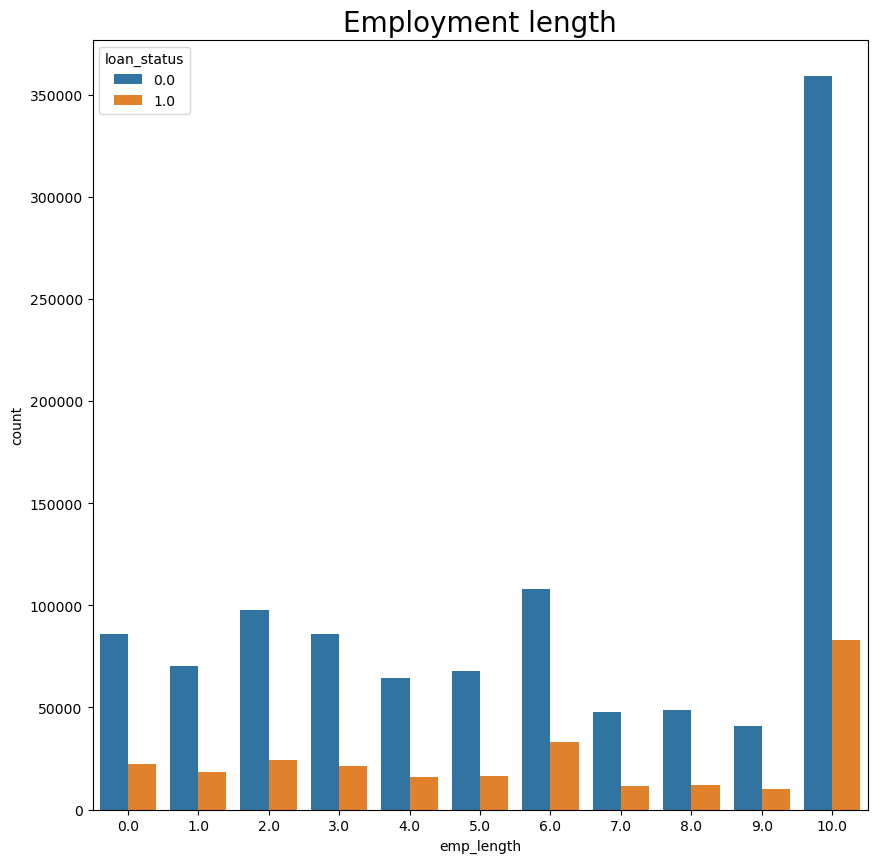

In [48]:
plt.figure(figsize=(10,10))
sns.countplot(data=df_filtered,x="emp_length",hue="loan_status")
plt.title('Employment length', size=20)

plt.show()

<AxesSubplot:title={'center':'Charge-off % by Employment length'}, xlabel='Employment length', ylabel='Charge-off %'>

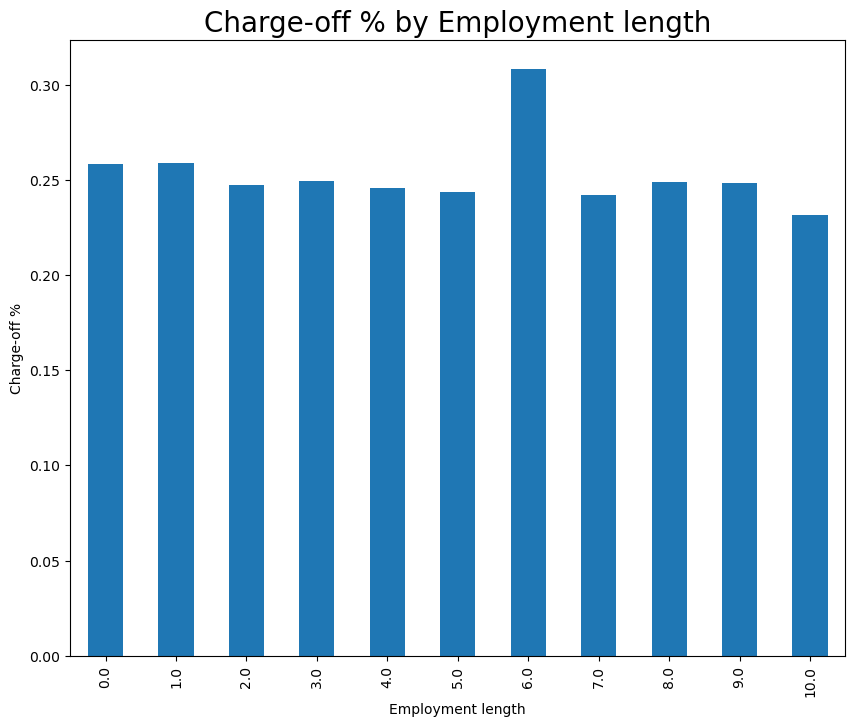

In [49]:
co = df_filtered[df_filtered['loan_status'] == 1]['emp_length'].value_counts() / df_filtered[df_filtered['loan_status'] == 0]['emp_length'].value_counts()
plt.figure(figsize=(10,8))

plt.xlabel('Employment length')
plt.ylabel( 'Charge-off %')
plt.title('Charge-off % by Employment length', size=20)

co.plot.bar()

**bỏ cột "emp_length" vì tỉ lệ Charge - off giữa các giá trị không quá chênh lệch**

In [50]:
df_filtered=df_filtered.drop(["emp_length"],axis=1)

In [51]:
df_filtered['grade'].value_counts()

B    392741
C    381686
A    235090
D    200953
E     93650
F     32058
G      9132
Name: grade, dtype: int64

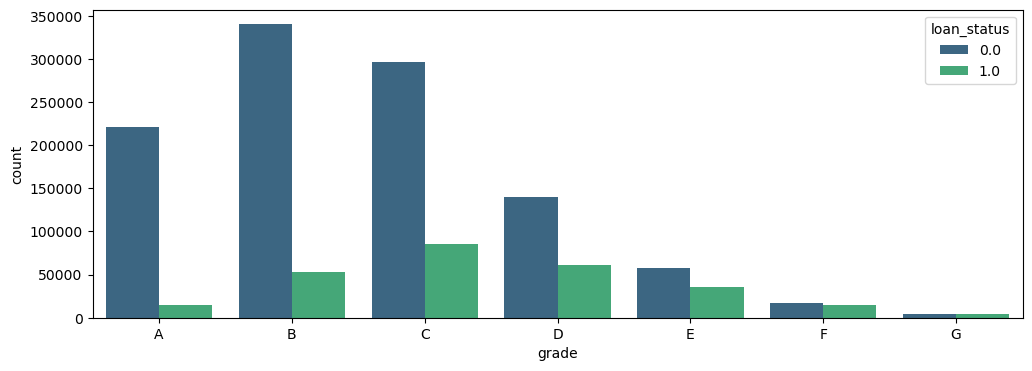

In [52]:
plt.figure(figsize=(12,4))
sns.countplot(x='grade',data=df_filtered,hue='loan_status', order=sorted(df_filtered['grade'].unique()), palette='viridis');


<AxesSubplot:xlabel='sub_grade', ylabel='count'>

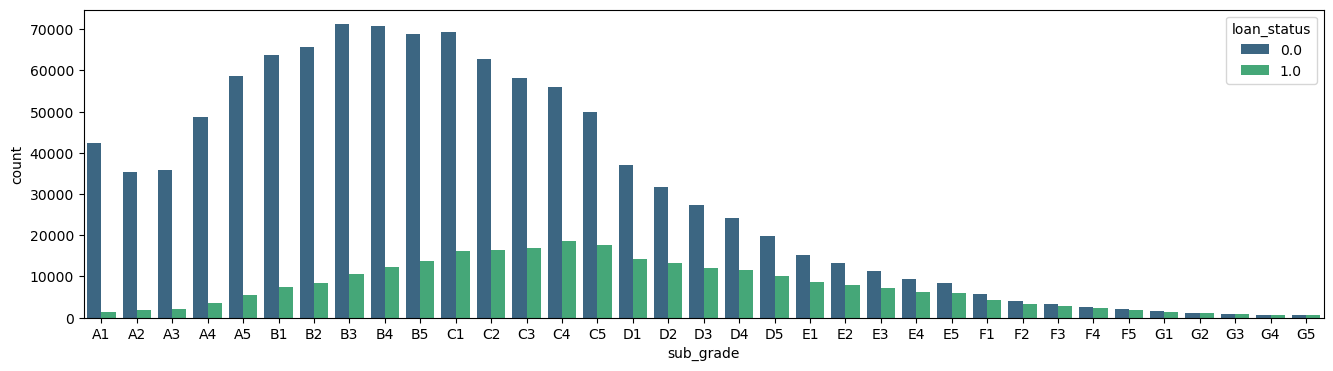

In [53]:
plt.figure(figsize=(16,4))
subgrade_order = sorted(df_filtered['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df_filtered,order = subgrade_order,palette='viridis' ,hue='loan_status')

**bỏ cột "grade" và giữ cột "sub_grade" vì chỉ cần dùng 1 trong 2 và cột "sub_grade" sẽ chi tiết hơn**

In [54]:
df_filtered=df_filtered.drop(["grade"],axis=1)

In [55]:
df_cor=df_filtered.corr().round(2)
df_cor

,annual_inc,dti,last_fico_range_high,last_fico_range_low,installment,loan_amnt,loan_status,revol_util,delinq_2yrs,acc_open_past_24mths,mort_acc
annual_inc,1.00,-0.14,0.07,0.06,0.30,0.31,-0.04,0.04,0.04,0.06,0.21
dti,-0.14,1.00,-0.08,-0.05,0.04,0.03,0.08,0.14,-0.01,0.12,-0.02
last_fico_range_high,0.07,-0.08,1.00,0.83,0.04,0.05,-0.67,-0.16,-0.07,-0.14,0.12
last_fico_range_low,0.06,-0.05,0.83,1.00,0.04,0.05,-0.58,-0.11,-0.04,-0.10,0.11
installment,0.30,0.04,0.04,0.04,1.00,0.95,0.05,0.13,0.01,0.03,0.19
loan_amnt,0.31,0.03,0.05,0.05,0.95,1.00,0.07,0.11,-0.00,0.01,0.22
loan_status,-0.04,0.08,-0.67,-0.58,0.05,0.07,1.00,0.06,0.02,0.10,-0.07
revol_util,0.04,0.14,-0.16,-0.11,0.13,0.11,0.06,1.00,-0.01,-0.22,0.03
delinq_2yrs,0.04,-0.01,-0.07,-0.04,0.01,-0.00,0.02,-0.01,1.00,-0.05,0.07
acc_open_past_24mths,0.06,0.12,-0.14,-0.10,0.03,0.01,0.10,-0.22,-0.05,1.00,0.06


<AxesSubplot:>

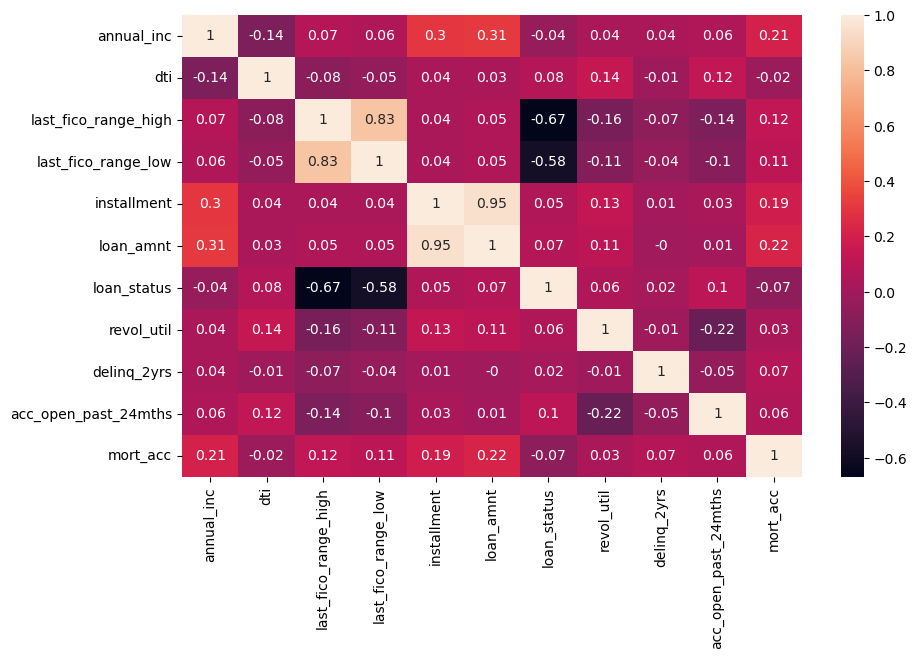

In [56]:
plt.figure(figsize=(10,6))
sns.heatmap(df_cor, annot=True)

**2 cột "last_fico_range_high" và "last_fico_range_low" có tương quan với nhau cao vì vậy sẽ tạo ra một cột khác được tính từ 2 cột này và bỏ 2 cột này đi**

**"installment" có tương quan rất cao với "loan_amnt" mà tương quan giữa "loan_amnt" và "loan_status" cao hơn so với tương quan giữa "installment" và "loan_status" => bỏ "installment"**

In [57]:
df_filtered["last_fico_avg"]=(df_filtered["last_fico_range_high"]+df_filtered["last_fico_range_low"])/2

df_filtered=df_filtered.drop(["last_fico_range_high","last_fico_range_low","installment"],axis=1)


In [58]:
df_filtered['home_ownership'].value_counts()

MORTGAGE    665579
RENT        534421
OWN         144832
ANY            286
OTHER          144
NONE            48
Name: home_ownership, dtype: int64

In [59]:
df_filtered['home_ownership'] = df_filtered['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')
df_filtered['home_ownership'].value_counts()

MORTGAGE    665579
RENT        534421
OWN         144832
OTHER          478
Name: home_ownership, dtype: int64

In [60]:
df_filtered['term'].value_counts()

 36 months    1020743
 60 months     324567
Name: term, dtype: int64

In [61]:
df_filtered['sub_grade'].value_counts()

C1    85494
B4    83199
B5    82538
B3    81827
C2    79213
C3    74998
C4    74421
B2    74024
B1    71153
C5    67560
A5    64003
A4    52235
D1    51321
D2    44848
A1    43678
D3    39317
A3    37996
A2    37178
D4    35566
D5    29901
E1    23749
E2    21377
E3    18387
E4    15720
E5    14417
F1     9970
F2     7198
F3     6088
F4     4859
F5     3943
G1     2997
G2     2131
G3     1614
G4     1280
G5     1110
Name: sub_grade, dtype: int64

In [62]:
df_filtered['verification_status'].value_counts()

Source Verified    521273
Verified           418336
Not Verified       405701
Name: verification_status, dtype: int64

### **One - hot - encoding**

In [63]:
columns_to_encode = ["home_ownership", "term", "sub_grade", "verification_status"]

df_filtered = pd.get_dummies(df_filtered, columns=columns_to_encode, drop_first=True)

df_filtered


,annual_inc,dti,loan_amnt,loan_status,revol_util,delinq_2yrs,acc_open_past_24mths,mort_acc,last_fico_avg,home_ownership_OTHER,...,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,verification_status_Source Verified,verification_status_Verified
0,55000.0,5.91,3600.0,0.0,29.7,0.0,4.0,1.0,562.0,0,...,0,0,0,0,0,0,0,0,0,0
1,65000.0,16.06,24700.0,0.0,19.2,1.0,4.0,4.0,697.0,0,...,0,0,0,0,0,0,0,0,0,0
2,63000.0,10.78,20000.0,0.0,56.2,0.0,6.0,5.0,702.0,0,...,0,0,0,0,0,0,0,0,0,0
4,104433.0,25.37,10400.0,0.0,64.5,1.0,10.0,6.0,702.0,0,...,0,0,0,0,0,0,0,0,1,0
5,34000.0,10.20,11950.0,0.0,68.4,0.0,0.0,0.0,757.0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260688,130000.0,20.59,18000.0,0.0,34.0,0.0,6.0,3.0,707.0,0,...,0,0,0,0,0,0,0,0,0,0
2260690,180792.0,22.03,29400.0,0.0,85.2,0.0,4.0,3.0,717.0,0,...,0,0,0,0,0,0,0,0,0,0
2260691,157000.0,10.34,32000.0,1.0,27.4,0.0,10.0,3.0,249.5,0,...,0,0,0,0,0,0,0,0,1,0
2260692,150000.0,12.25,16000.0,0.0,55.0,0.0,9.0,0.0,682.0,0,...,0,0,0,0,0,0,0,0,0,0


## **Train**

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score,recall_score
from sklearn.preprocessing import StandardScaler



In [65]:
pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
     -------------------------------------- 258.3/258.3 kB 1.3 MB/s eta 0:00:00
     -------------------------------------- 307.7/307.7 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [78]:
from imblearn.over_sampling import SMOTE

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [80]:
y_train.value_counts()

0.0    753384
1.0    188333
Name: loan_status, dtype: int64

In [81]:
smote = SMOTE(random_state=42)

X_train, y_train = smote.fit_resample(X_train, y_train)


In [83]:
y_train.value_counts()

0.0    753384
1.0    753384
Name: loan_status, dtype: int64

In [84]:

scaler = StandardScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Huấn luyện mô hình
model = LogisticRegression()
model.fit(X_train, y_train)
model.coef_

array([[-1.27165372e-01,  2.13383131e-01,  3.45486078e-01,
        -1.88818905e-02,  2.46102908e-02,  1.02560562e-01,
        -1.28205652e-01, -3.57711845e+00, -1.20384342e-03,
        -5.94230327e-02, -8.69240911e-02,  3.38840685e-01,
        -5.73953280e-01, -5.88978778e-01, -6.84439930e-01,
        -7.47348723e-01, -7.81856684e-01, -8.09573020e-01,
        -8.53664505e-01, -8.46699912e-01, -8.32987298e-01,
        -8.52384881e-01, -8.29129074e-01, -8.00242054e-01,
        -7.94909399e-01, -7.59088093e-01, -6.69393552e-01,
        -6.13147071e-01, -5.80801907e-01, -5.55175944e-01,
        -5.07089460e-01, -4.52629567e-01, -4.27133250e-01,
        -3.98256714e-01, -3.73222178e-01, -3.54819859e-01,
        -3.00455685e-01, -2.47003665e-01, -2.34082977e-01,
        -2.02146401e-01, -1.79668554e-01, -1.59037294e-01,
        -1.40366591e-01, -1.19509573e-01, -1.05359181e-01,
        -9.63733973e-02, -1.55240679e-01, -1.25894914e-01]])

In [85]:
def threshold(y_pred, threshold):
    return [1 if y > threshold else 0 for y in y_pred]

In [86]:
y_predprob_test2 = model.predict_proba(X_test)[:,1]
y_predprob_test2 = threshold(y_predprob_test2, 0.4)

In [87]:
y_predprob_test2

[0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,


In [88]:
X_train_predictions = model.predict(X_train)
y_test_predictions = model.predict(X_test)


### **Evaluation**

In [89]:

print('Accuracy score:', accuracy_score(y_test, y_predprob_test2))
print('Confusion matrix:')
print(confusion_matrix(y_test,y_predprob_test2))

Accuracy score: 0.8933356128575074
Confusion matrix:
[[297203  26164]
 [ 16885  63341]]


In [90]:
f1_score(y_test, y_test_predictions
        )


0.7328351913985535

**Confusion matrix với threshold mặc định**

Text(0.5, 427.9555555555555, 'Predicted label')

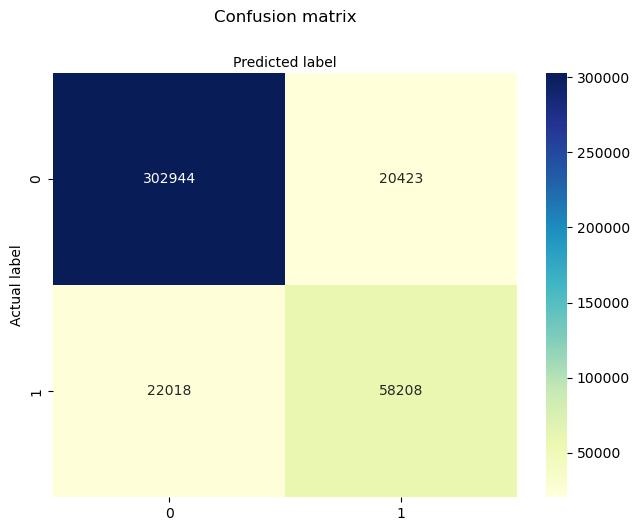

In [91]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# vẽ heatmap
cnf_matrix=confusion_matrix(y_test, y_test_predictions)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Confusion matrix với threshold = 0.4**

Text(0.5, 427.9555555555555, 'Predicted label')

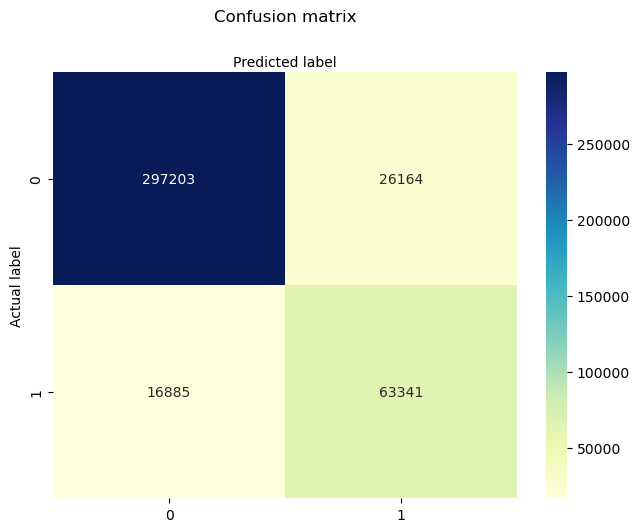

In [92]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# vẽ heatmap
cnf_matrix=confusion_matrix(y_test, y_predprob_test2)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [105]:
accuracy =  accuracy_score(y_test, y_test_predictions)
accuracy

0.8948420810073515

In [93]:
precision_train = precision_score(y_train,X_train_predictions)
precision_train

0.9360097261222216

In [94]:
precision_test = precision_score(y_test,y_test_predictions)
precision_test

0.7402678332973001

In [100]:
recall_test = recall_score(y_test,y_test_predictions)
recall_test

0.7255503203450253

In [96]:
recall_train = recall_score(y_test,y_test_predictions)
recall_train

0.7255503203450253

**Chỉ số đánh giá với threshold = 0.4**

In [106]:
accuracy =  accuracy_score(y_test, y_predprob_test2)
accuracy

0.8933356128575074

In [102]:
precision_test_prob = precision_score(y_test,y_predprob_test2)
precision_test_prob

0.7076811351321155

In [103]:
recall_test = recall_score(y_test, y_predprob_test2)
recall_test

0.7895320718968912

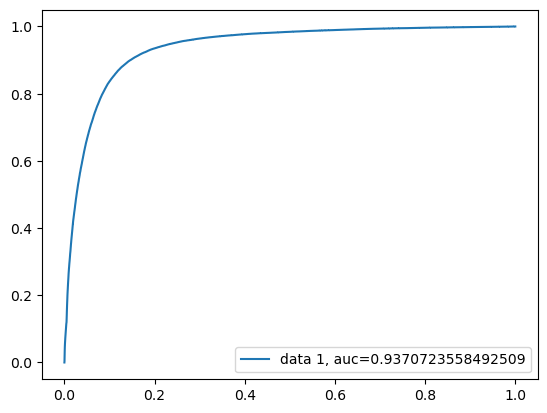

In [97]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_test_proba)
auc = metrics.roc_auc_score(y_test, y_test_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [98]:
df_filtered.corr()['loan_status'].apply(abs).sort_values(ascending = False).head(30)

loan_status                     1.000000
last_fico_avg                   0.636838
term_ 60 months                 0.176096
acc_open_past_24mths            0.099427
dti                             0.084499
mort_acc                        0.072468
home_ownership_RENT             0.066086
sub_grade_A4                    0.065847
loan_amnt                       0.065604
verification_status_Verified    0.065409
sub_grade_A5                    0.064627
sub_grade_A2                    0.064523
sub_grade_A3                    0.061648
revol_util                      0.060029
sub_grade_E5                    0.056783
sub_grade_B1                    0.056408
sub_grade_E2                    0.055894
sub_grade_E3                    0.055216
sub_grade_E4                    0.054784
sub_grade_E1                    0.054001
sub_grade_B2                    0.051934
sub_grade_D4                    0.051142
sub_grade_D5                    0.050786
sub_grade_F1                    0.048280
sub_grade_F2    